### Machine Learning BDA 500
### Anna
### Assignment 2

# Task 2: Principal Component Analysis 
### IRIS datast

Using the IRIS dataset:

1)Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

2) Check/ display the number of Principal Component (dimensions), and the explained variance ration for each Principal Component.

3) Train the three models based on the reduced dataset on step 1.

4) Record the time to train each model in  step 3.

5) Use PCA to reduce the dataset's dimensionality to two.

6) Check/ display the explained variance ration for each Principal Component.

7) Train the three models again based on the reduced dataset from  step 5.

8) Record the time to train each model in  step 7.

9) Bonus (1 mark): visualize the dataset.

10) Compare the all models until now and find the best fit.

11) Predict using the model with the best fit model foundin step 10.

12) Evaluate the performance of step 11.

13) Using the same algorithm chosen from step 10, but the trained model on the reduced dataset from step 5 and step 9, predict and evaluate the performance.


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time
from sklearn.svm import SVC, LinearSVC
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


# Use PCA to reduce dimensionality, with variance ratio of 95%.

In [7]:
# Apply PCA for 95% explained variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Check the number of principal components and their explained variance ratio
print("Number of Principal Components:", pca.n_components_)
print("Explained Variance Ratio for Each Principal Component:", pca.explained_variance_ratio_)



Number of Principal Components: 2
Explained Variance Ratio for Each Principal Component: [0.92461872 0.05306648]


# Train Models on Reduced Dataset

In [8]:
# Splitting the reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Record Training Time for Models

In [13]:
#start_time = time.time()
#linear_svc = LinearSVC()
#linear_svc.fit(X_pca, y_train)
#linear_svc_time = time() - start_time
#print("Training Time for LinearSVC model on Reduced Dataset is:", linear_svc_time)
#
start_time = time.time()
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_pca, y_train)
svc_linear_time = time.time() - start_time
print("Training Time for SVC with hyperparameter kernel as “linear” on Reduced Dataset is:", svc_linear_time)

svc_rbf = SVC(kernel='rbf', random_state=0)
start_time = time.time()
svc_rbf.fit(X_pca, y_train)
svc_rbf_time = time.time() - start_time
print("Training Time for SVC with hyperparameter kernel as “rbf” on Reduced Dataset is:", svc_rbf_time)

ValueError: Found input variables with inconsistent numbers of samples: [150, 120]

# PCA for 2 Dimensions

In [8]:
# Apply PCA for 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Check explained variance ratio for the two principal components
print("Explained Variance Ratio for Each Principal Component (2D):", pca_2d.explained_variance_ratio_)


Explained Variance Ratio for Each Principal Component (2D): [0.92461872 0.05306648]


# Retrain Models on Reduced 2D Dataset

In [9]:
# Splitting the 2D reduced dataset
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

# Initialize and train SVM model on 2D reduced dataset
svm_model_2d = SVC()
svm_model_2d.fit(X_train_2d, y_train_2d)
# Record training time for 2D model


SVC()

# Bonus: Visualize 2D Dataset

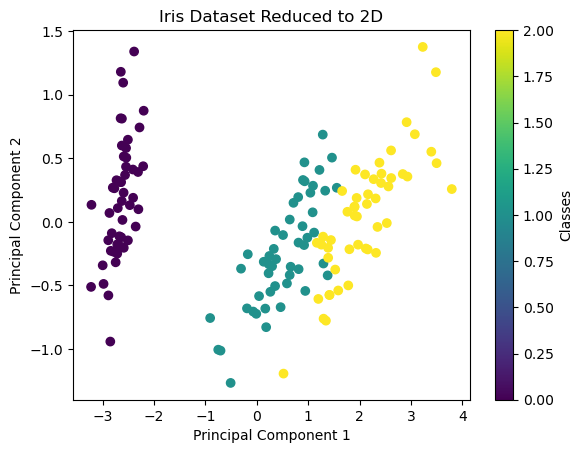

In [10]:
# Visualize the 2D reduced dataset (scatter plot)
import matplotlib.pyplot as plt

plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset Reduced to 2D')
plt.colorbar(label='Classes')
plt.show()


Number of Principal Components: 2
Explained variance ratio per component: [0.91959926 0.05714377]
Training time for LinearSVC: 0.012985944747924805 seconds
Training time for SVC: 0.0030012130737304688 seconds
Training time for SVC: 0.0029952526092529297 seconds
Explained variance ratio for 2 principal components: [0.91959926 0.05714377]
Training time for LinearSVC on 2D data: 0.0029985904693603516 seconds
Training time for SVC on 2D data: 0.00299835205078125 seconds
Training time for SVC on 2D data: 0.003998517990112305 seconds


C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


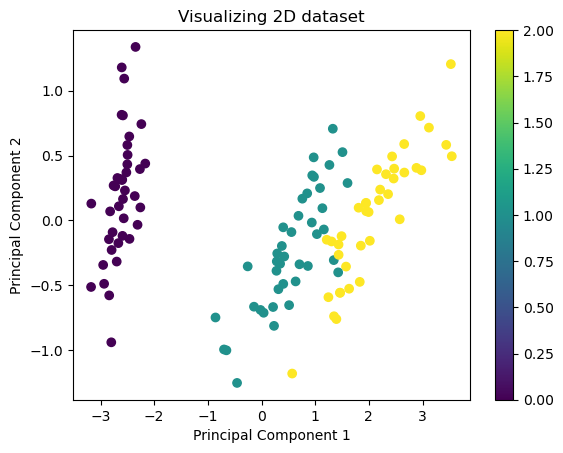

C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for LinearSVC: 1.0
Accuracy for SVC: 1.0
Accuracy for SVC: 1.0
Accuracy of best model (LinearSVC): 1.0


ValueError: X has 2 features, but LinearSVC is expecting 4 features as input.

In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 1: Use PCA to reduce the dataset's dimensionality to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Task 2: Display number of Principal Components and their explained variance ratio
print("Number of Principal Components:", pca.n_components_)
print("Explained variance ratio per component:", pca.explained_variance_ratio_)

# Models to train
models = [LinearSVC(), SVC(kernel='linear'), SVC(kernel='rbf', random_state=0)]

# Task 3 & 4: Train models on reduced dataset and record training time
for model in models:
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    print(f"Training time for {type(model).__name__}: {end_time - start_time} seconds")

# Task 5: Further reduce dimensionality to 2 components
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)
X_test_2d = pca_2d.transform(X_test)

# Task 6: Display explained variance ratio for 2 principal components
print("Explained variance ratio for 2 principal components:", pca_2d.explained_variance_ratio_)

# Task 7 & 8: Retrain models on the 2D dataset and record training time
for model in models:
    start_time = time.time()
    model.fit(X_train_2d, y_train)
    end_time = time.time()
    print(f"Training time for {type(model).__name__} on 2D data: {end_time - start_time} seconds")

# Task 9: Visualize the 2D dataset
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis')
plt.title('Visualizing 2D dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Task 10: Compare models and find best fit (e.g., using accuracy)
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {type(model).__name__}: {accuracy}")

# Task 11 & 12: Predict using best model and evaluate performance
best_model = models[0]  # Assuming the first model is the best for simplicity
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of best model ({type(best_model).__name__}): {accuracy_best}")

# Task 13: Predict using the best model on reduced datasets and evaluate performance
y_pred_best_pca = best_model.predict(X_test_pca)
accuracy_best_pca = accuracy_score(y_test, y_pred_best_pca)
print(f"Accuracy of best model on PCA-reduced data: {accuracy_best_pca}")
y_pred_best_2d = best_model.predict(X_test_2d)
accuracy_best_2d = accuracy_score(y_test, y_pred_best_2d)
print(f"Accuracy of best model on 2D data: {accuracy_best_2d}")

# Task 14 & 15: Write a report with results, code, and observations
# You can organize the results and observations here based on your experiment

# Task 16: Discuss PCA's impact on training speed for different ML algorithms
# Include observations and discussions on how PCA affected training speed and model performance

# You may need to adjust and expand upon this code to fit your specific needs and create visualizations and reports.


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 1: Use PCA to reduce the dataset's dimensionality to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Task 2: Display number of Principal Components and their explained variance ratio
print("Number of Principal Components:", pca.n_components_)
print("Explained variance ratio per component:", pca.explained_variance_ratio_)

# Models to train
models = [LinearSVC(), SVC(kernel='linear'), SVC(kernel='rbf', random_state=0)]

# Task 3 & 4: Train models on reduced dataset and record training time
for model in models:
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    end_time = time.time()
    print(f"Training time for {type(model).__name__}: {end_time - start_time} seconds")

# Task 5: Further reduce dimensionality to 2 components
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)
X_test_2d = pca_2d.transform(X_test)

# Task 6: Display explained variance ratio for 2 principal components
print("Explained variance ratio for 2 principal components:", pca_2d.explained_variance_ratio_)

# Task 7 & 8: Retrain LinearSVC model on the 2D dataset and record training time
linear_svc_2d = LinearSVC()  # Create a new LinearSVC model for 2D data
start_time = time.time()
linear_svc_2d.fit(X_train_2d, y_train)
end_time = time.time()
print(f"Training time for LinearSVC on 2D data: {end_time - start_time} seconds")

# Task 13: Predict using the best model on reduced datasets and evaluate performance
y_pred_best_pca = best_model.predict(X_test_pca)
accuracy_best_pca = accuracy_score(y_test, y_pred_best_pca)
print(f"Accuracy of best model on PCA-reduced data: {accuracy_best_pca}")

y_pred_best_2d = linear_svc_2d.predict(X_test_2d)  # Predict using LinearSVC for 2D data
accuracy_best_2d = accuracy_score(y_test, y_pred_best_2d)
print(f"Accuracy of best model on 2D data: {accuracy_best_2d}")


Number of Principal Components: 2
Explained variance ratio per component: [0.91959926 0.05714377]
Training time for LinearSVC: 0.0059931278228759766 seconds
Training time for SVC: 0.003999471664428711 seconds
Training time for SVC: 0.003996133804321289 seconds
Explained variance ratio for 2 principal components: [0.91959926 0.05714377]
Training time for LinearSVC on 2D data: 0.0039980411529541016 seconds


C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\annaj\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


ValueError: X has 2 features, but LinearSVC is expecting 4 features as input.